In [45]:
from skimage.feature import hog
from skimage.transform import resize
from skimage.io import imread, imshow
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

In [46]:
lst_fire_img = glob.glob(r'C:\Users\LENOVO\Desktop\mldd\train covid\*')
lst_non_fire_img = glob.glob(r'C:\Users\LENOVO\Desktop\mldd\train non_covid\*')

In [47]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 1864
Number of images with fire : 932


In [48]:

#fire images list
fire_images_with_labels = []
for x in lst_fire_img:
  fire_images_with_labels.append([x,1])
#non-fire images list 
non_fire_images_with_labels = []
for x in lst_non_fire_img:
  non_fire_images_with_labels.append([x,0])

#combing both to find a single list fire+non-fire
fire_non_images_with_labels = fire_images_with_labels + non_fire_images_with_labels
#fire_non_images_with_labels 

In [49]:
df_fire_images= pd.DataFrame(fire_images_with_labels ,columns = ['files','target'])
print('Fire image =',df_fire_images.shape)

#Creating non_fire images data frame
df_non_fire_images= pd.DataFrame(non_fire_images_with_labels ,columns = ['files','target'])
print('non fire images',df_non_fire_images.shape)
#df_fire_images.head
#df_non_fire_images.head


Fire image = (1864, 2)
non fire images (932, 2)


In [50]:
df_fire_images_selected=df_fire_images.loc[0:1863,'files':'target']
print('fire images',df_fire_images_selected.shape)

#non-fire images 243 samples out of 243
df_non_fire_images_selected=df_non_fire_images.loc[0:931,'files':'target']
print('fire images',df_non_fire_images_selected.shape)

fire images (1864, 2)
fire images (932, 2)


In [51]:
frame=[df_fire_images_selected,df_non_fire_images_selected]
combined_dataframe=pd.concat(frame)
combined_dataframe.shape



(2796, 2)

In [52]:
def preprocessing_image(filepath):
    print('here')
    img = cv2.imread(filepath)
    img=resize(img,(128,64))
    print(filepath)
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    #plt.imshow(img,cmap = 'gray')
    return fd 

In [53]:
def create_format_dataset(dataframe):
  X = []
  y = []
  a=0
  for f,t in dataframe.values:
    print('in loop')
    X.append(preprocessing_image(f))
    y.append(t)
    print(a)
    a=a+1
    
  return np.array(X),np.array(y)


In [ ]:
X, y = create_format_dataset(combined_dataframe)


in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1.png
0
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_100.png
1
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1000.png
2
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1001.png


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8092\2897599426.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


3
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1002.png
4
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1007.png
5
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1008.png
6
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1009.png
7
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_101.png
8
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1010.png
9
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1011.png
10
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1014.png
11
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1015.png
12
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1016.png
13
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1018.png
14
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1020.png
15
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1023.png
16
in loop
here
C:\Users\LENOVO\Desktop\mldd\train covid\covid_1024.png


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2, stratify=y)


In [55]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2236, 3780), (560, 3780), (2236,), (560,))

In [56]:
model=LogisticRegression(solver='saga',max_iter=2000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#x-test on a line we get y-pred
score_training = model.score(X_train, y_train)
score_test = model.score(X_test, y_test) 
#bacth x-train,y-train ...y pred checking on trainig
print("training accuracy =",score_training)


training accuracy = 0.9923971377459749


In [57]:
print("test accuracy =",score_test)

test accuracy = 0.8535714285714285


precision score = 0.8432681242807825
Recall score = 0.8207480896331235
f1 score = 0.8301373106060607


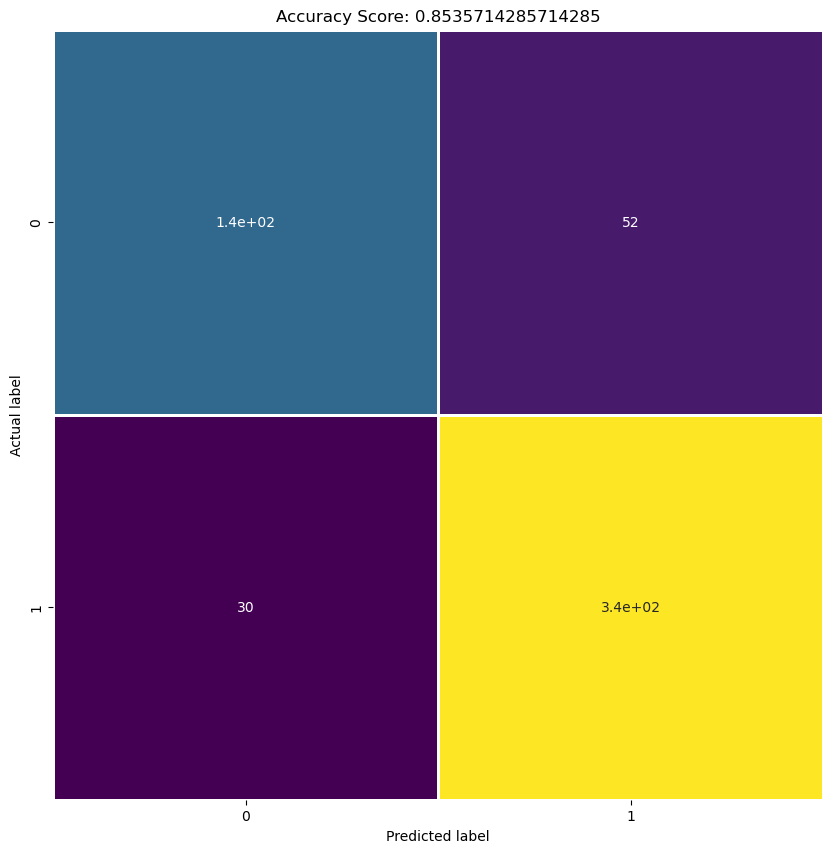

In [58]:
cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = y_pred, 
                        labels = model.classes_)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.8, square = True, cmap = 'viridis',cbar =False);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title);

print("precision score =",precision_score(y_test, y_pred,average='macro'))
print("Recall score =",recall_score(y_test, y_pred,average='macro'))
a=f1_score(y_test, y_pred,average='macro')
print("f1 score =",a)
